Autor: Erick Rodríguez Martínez
Fecha: 20/Febrero/2023

# Master Universitario en Inteligencía Artificial
## Percepción Computacional
### Actividad 3 - Evaluación de Clasificadores

asdasdasdasds


## Importar Librerias

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2
from matplotlib import pyplot as pl
from skimage.segmentation import watershed
from skimage.color import label2rgb
from skimage.feature import peak_local_max
from skimage.filters import threshold_otsu, threshold_local, _multiotsu
from skimage.filters import threshold_minimum

from scipy import ndimage
#!pip install imutils
import imutils
import mahotas

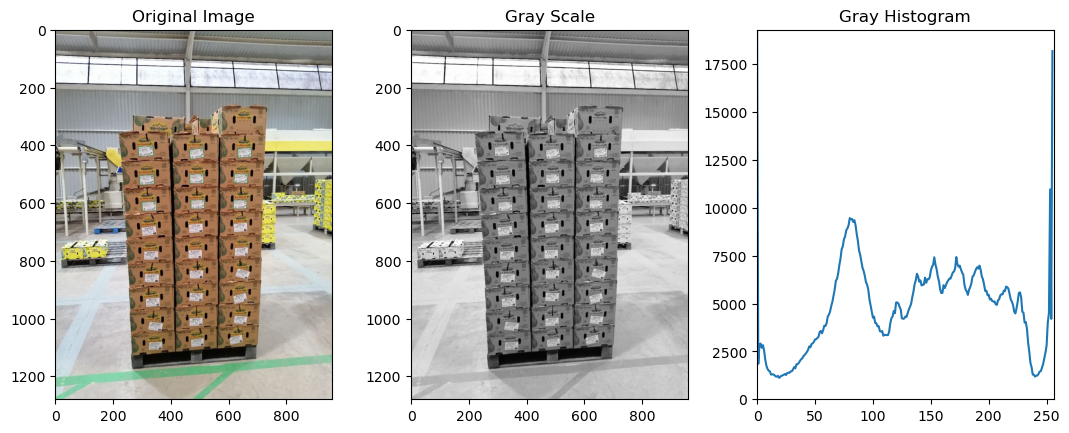

In [9]:
imgSRC = cv2.imread('water_coins.jpg')
imgSRC = cv2.imread('Pallet.jpeg')
#imgSRC = cv2.imread('PinkAvocado.jpeg')
#imgSRC = cv2.imread('Wharehouse.jpg')
#imgSRC = cv2.imread('PackingHouse.jpeg')

imgRGB = cv2.cvtColor(imgSRC, cv2.COLOR_BGR2RGB)
imgGray = cv2.cvtColor(imgSRC, cv2.COLOR_BGR2GRAY)

plt.figure()
plt.subplots_adjust(right = 1.7)
plt.subplot(1, 3, 1)
plt.imshow(imgRGB)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(imgGray, cmap='gray')
plt.title('Gray Scale')

plt.subplot(1, 3, 3)
hist = cv2.calcHist([imgSRC], [0], None, [256], [0, 256])
plt.xlim([0, 256])
plt.ylim([0, hist.max()])
plt.plot(hist)
plt.title('Gray Histogram');

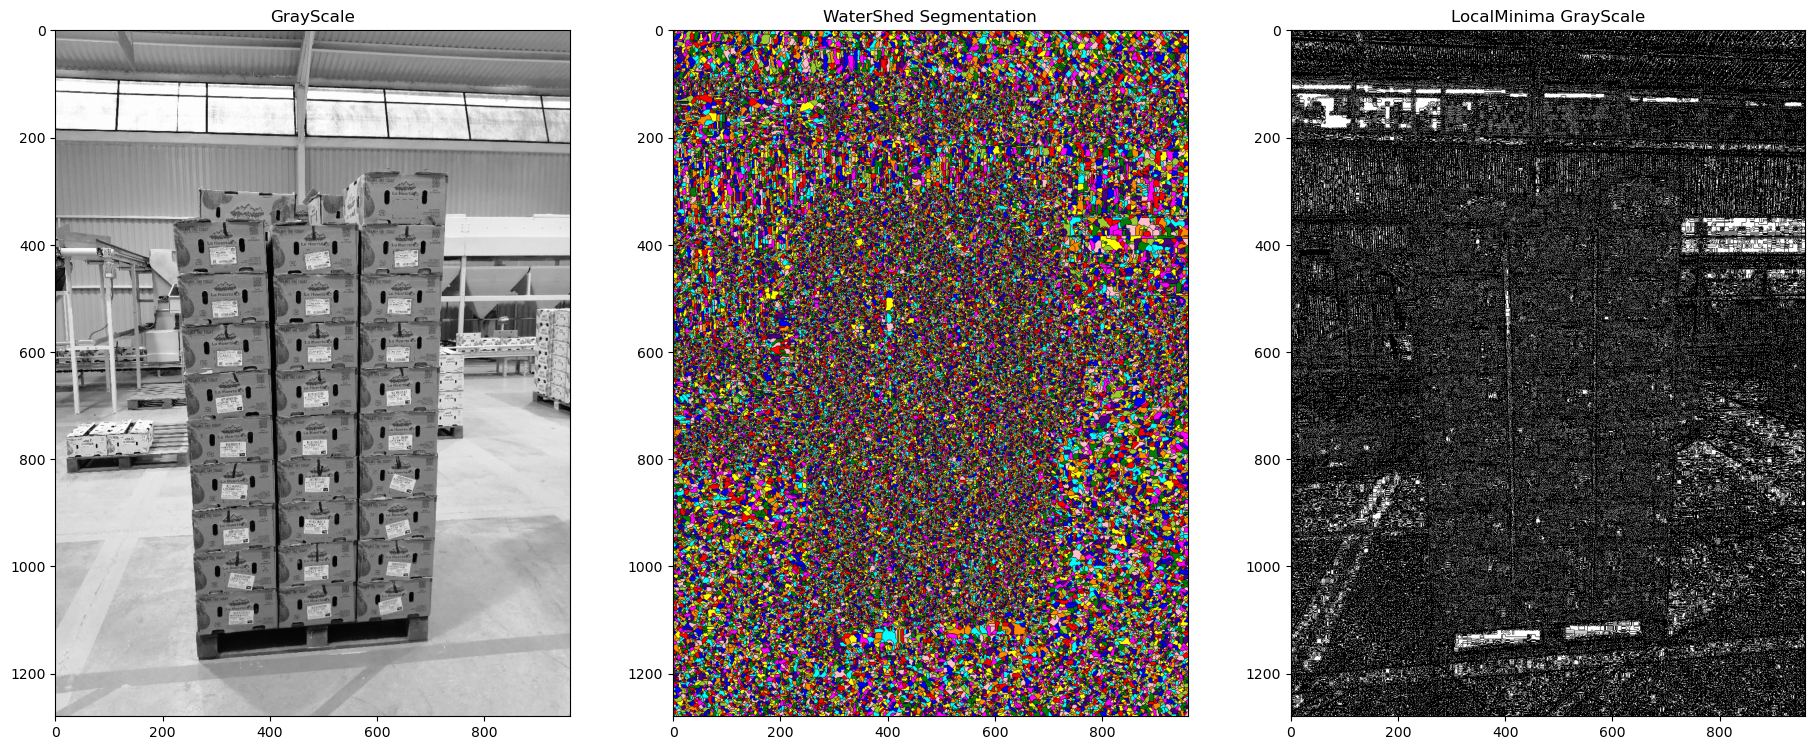

In [10]:
thWaterShed = watershed(imgGray, watershed_line=True)
wSSegmentation = label2rgb(thWaterShed)
imgLocMin = mahotas.locmin((imgGray))

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(wSSegmentation)
plt.title('WaterShed Segmentation');

plt.subplot(1, 3, 3)
plt.imshow(imgLocMin, cmap='gray')
plt.title('LocalMinima GrayScale');

155.0


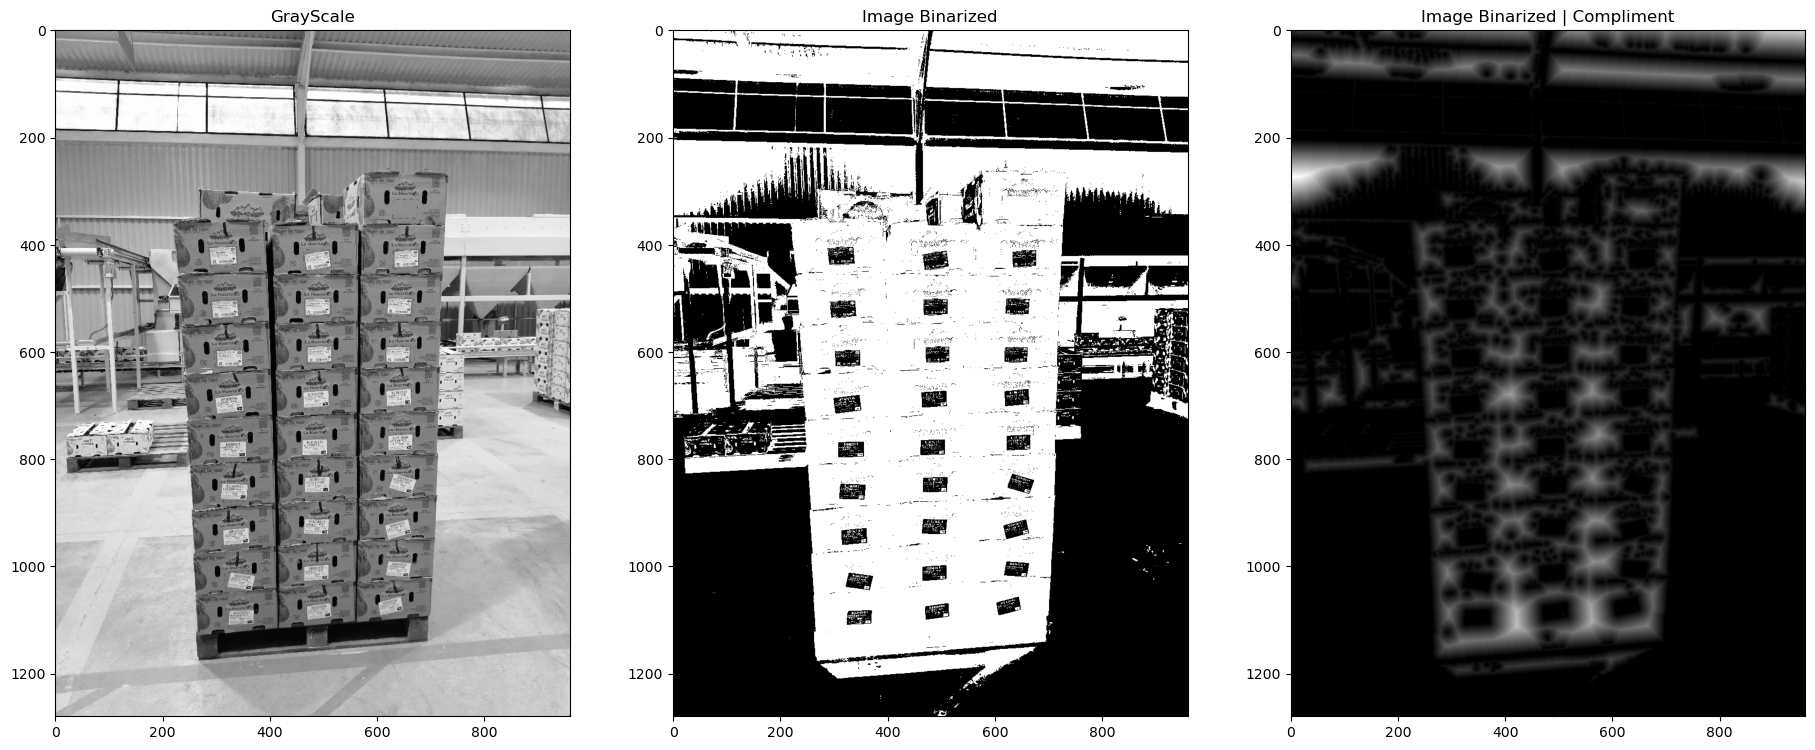

In [11]:
#otsuTh = threshold_otsu(imgGray)
#print(otsuTh)
#binary = imgGray > otsuTh

ret, otsuThresh = cv2.threshold(imgGray,0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
print(ret)

#open = cv2.morphologyEx(otsuThresh, cv2.MOR)
dist = cv2.distanceTransform(~otsuThresh, cv2.DIST_L2, 0)
cv2.normalize(dist, dist, 0, 1.0, cv2.NORM_MINMAX)

kernel = np.ones((3,3),np.uint8)
closing = cv2.morphologyEx(dist,cv2.MORPH_ERODE, kernel, iterations = 2)

# Normalize the distance image for range = {0.0, 1.0}
# so we can visualize and threshold it

#cv2.imshow('Distance Transform Image', dist)
#ret, dist1 = cv2.threshold(dist, 0.6*dist.max(), 255, 0)

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(~otsuThresh, cmap='gray')
plt.title('Image Binarized');

plt.subplot(1, 3, 3)
plt.imshow(dist, cmap='gray')
plt.title('Image Binarized | Compliment');

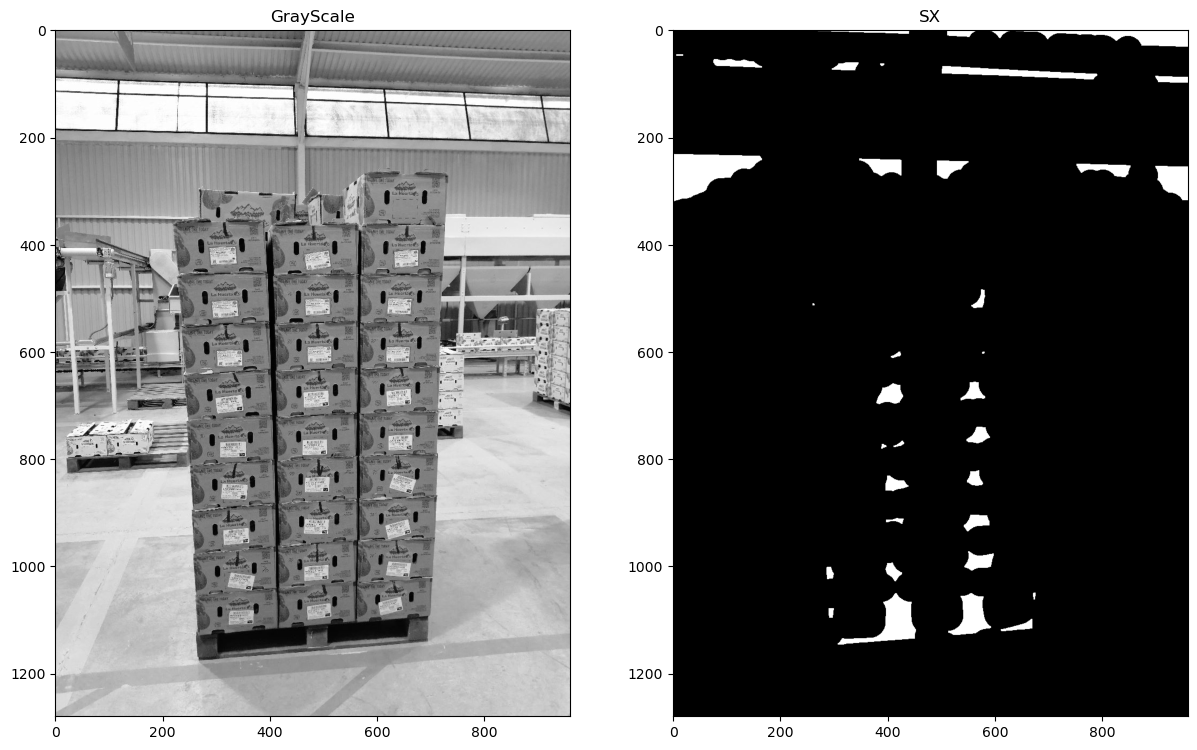

In [12]:
_, dist = cv2.threshold(dist, 0.4, 1.0, cv2.THRESH_BINARY)
# Dilate a bit the dist image
kernel1 = np.ones((3,3), dtype=np.uint8)
dist = cv2.dilate(dist, kernel1)

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(dist, cmap='gray')
plt.title('SX');

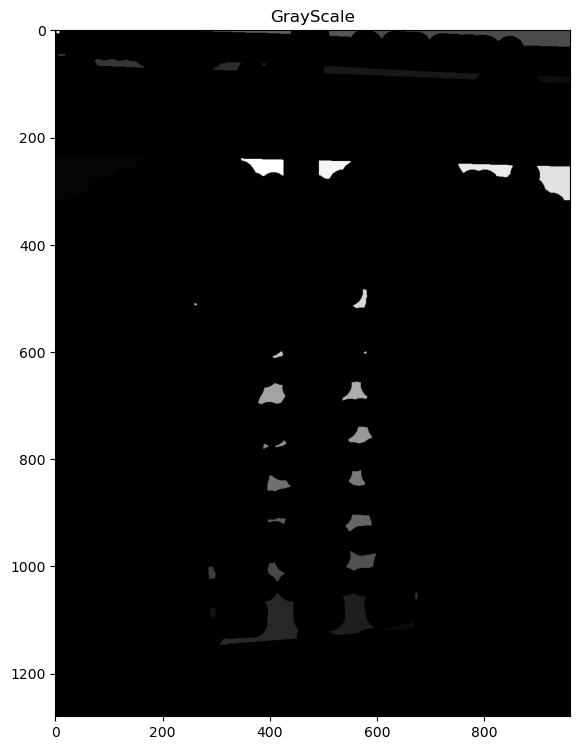

In [13]:
# Create the CV_8U version of the distance image
# It is needed for findContours()
dist_8u = dist.astype('uint8')

# Find total markers
contours, _ = cv2.findContours(dist_8u, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Create the marker image for the watershed algorithm
markers = np.zeros(dist.shape, dtype=np.int32)

# Draw the foreground markers
for i in range(len(contours)):
    cv2.drawContours(markers, contours, i, (i+1), -1)
# Draw the background marker
cv2.circle(markers, (5,5), 3, (255,255,255), -1)
markers_8u = (markers * 10).astype('uint8')

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(markers_8u, cmap='gray')
plt.title('GrayScale');


NameError: name 'binary2' is not defined

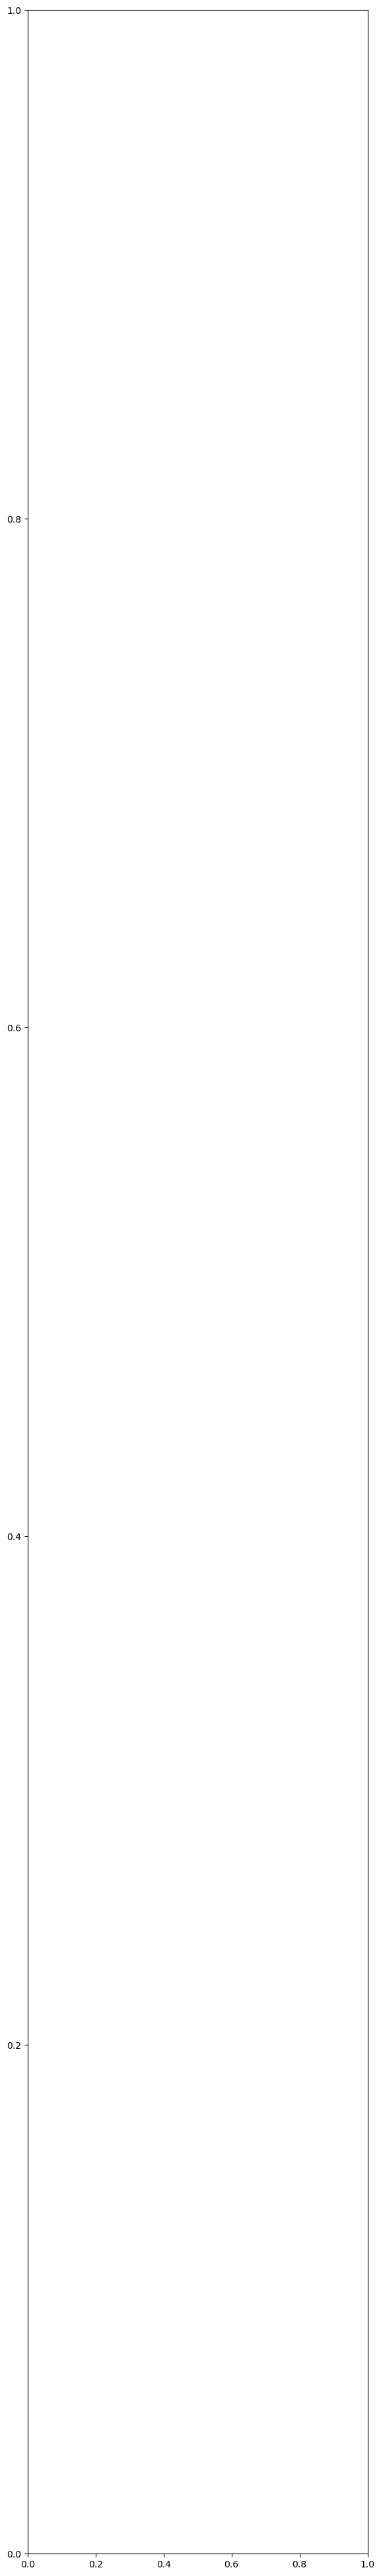

In [14]:
thWaterShed2 = watershed(markers_8u,markers=markers, watershed_line=True)
wSSegmentation2 = label2rgb(thWaterShed2)
imgLocMin2 = mahotas.locmin((dist))

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(binary2, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(wSSegmentation2)
plt.title('WaterShed Segmentation');

plt.subplot(1, 3, 3)
plt.imshow(imgLocMin2, cmap='gray')
plt.title('LocalMinima GrayScale');

In [ ]:
sobelx = cv2.Sobel(dist,cv2.CV_64F,1,0,ksize=3)
sobely = cv2.Sobel(dist,cv2.CV_64F,0,1,ksize=3)

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(imgGray, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(sobelx, cmap='gray')
plt.title('SX');

plt.subplot(1, 3, 3)
plt.imshow(sobely, cmap='gray')
plt.title('Sy');


In [ ]:
abs_grad_x = cv2.convertScaleAbs(sobelx)
abs_grad_y = cv2.convertScaleAbs(sobely)

grad = cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0.0)

plt.figure(figsize = (20,50))
plt.subplots_adjust(right = 1)

plt.subplot(1, 2, 1)
plt.imshow(grad)
plt.title('GrayScale');

plt.subplot(1, 2, 2)
plt.imshow(grad, cmap='gray')

In [ ]:
otsuTh2 = threshold_otsu(grad)
print(otsuTh2)
binary2 = grad > otsuTh2

ret, threshXXX = cv2.threshold(grad,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

thWaterShed2 = watershed(-dist, watershed_line=True)
wSSegmentation2 = label2rgb(thWaterShed2)
imgLocMin2 = mahotas.locmin((dist))

plt.figure(figsize=(20,50))
pl.subplots_adjust(right=1)
plt.subplots_adjust(right=1)

plt.subplot(1, 3, 1)
plt.imshow(binary2, cmap='gray')
plt.title('GrayScale');

plt.subplot(1, 3, 2)
plt.imshow(wSSegmentation2)
plt.title('WaterShed Segmentation');

plt.subplot(1, 3, 3)
plt.imshow(imgLocMin2, cmap='gray')
plt.title('LocalMinima GrayScale');

In [ ]:
# apply Otsu's automatic thresholding which automatically determines
# the best threshold value
(T, threshInv) = cv2.threshold(imgGray, 0, 256, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU)
print(T)

plt.figure(figsize=(20, 50))
plt.subplot(1, 2, 1)
plt.imshow(threshInv, cmap='gray')
plt.title('s')

masked = cv2.bitwise_and(imgRGB, imgRGB, mask=threshInv)
plt.subplot(1, 2, 2)
plt.imshow(masked)

#cv2.imshow("Output", masked)
#cv2.waitKey(0)